## Etape 1 : Initialisation des modules Python

In [8]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import sys
sys.path.append('..')
import ep.etools as ept

fit_verbosity = 1


In [7]:
print(tf.__version__)
print(tf.config.list_physical_devices())

2.8.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
# from tensorflow.python.compiler import mlcompute
# mlcompute.set_mlc_device(device_name='gpu')

## Etape 2 : Récupération des données

depuis Keras on charge les train_set et test_set de la dataset MNIST

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


## Etape 3 : Préparation des données

* on calcul moyenne et écart-type
* on normalise pour obtenir un dataset de moyenne zéro et d'écart-type 0.

dans le cas présent on divise simplement par le maxi qui doite être 255 !

In [13]:
xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('Aprés normalisation  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Aprés normalisation  : Min=0.0, max=1.0


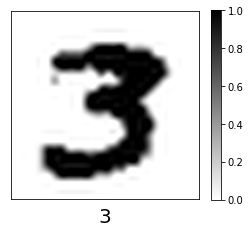

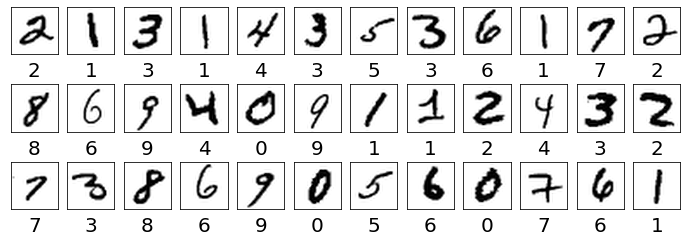

In [14]:
ept.plot_images(x_train,y_train , [27],  x_size=5,y_size=5, colorbar=True) #, save_as='01-one-digit')
# plt.imshow(x_train[0], cmap='Blues')
ept.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')


## Etape 4 - Création du model
Les informations se trouvent ci-aprés : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [19]:
model = keras.Sequential()
model.add(keras.layers.Input((28, 28,1)))

model.add(keras.layers.Conv2D(8,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(16,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 8)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 16)         

## Etape 5 : Entrainement du Model

In [20]:
batch_size = 512
epochs = 16

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose= fit_verbosity,
                    validation_data=(x_test, y_test))

Epoch 1/16


2022-05-05 22:29:51.059324: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-05 22:29:51.323272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - ETA: 0s - loss: 1.0124 - accuracy: 0.6711

2022-05-05 22:29:56.971916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 6s 25ms/step - loss: 1.0124 - accuracy: 0.6711 - val_loss: 0.2334 - val_accuracy: 0.9363
Epoch 2/16
118/118 [==============================] - 2s 21ms/step - loss: 0.3257 - accuracy: 0.8999 - val_loss: 0.1289 - val_accuracy: 0.9616
Epoch 3/16
118/118 [==============================] - 2s 20ms/step - loss: 0.2340 - accuracy: 0.9291 - val_loss: 0.0948 - val_accuracy: 0.9723
Epoch 4/16
118/118 [==============================] - 2s 21ms/step - loss: 0.1930 - accuracy: 0.9415 - val_loss: 0.0797 - val_accuracy: 0.9757
Epoch 5/16
118/118 [==============================] - 2s 20ms/step - loss: 0.1697 - accuracy: 0.9498 - val_loss: 0.0696 - val_accuracy: 0.9779
Epoch 6/16
118/118 [==============================] - 2s 20ms/step - loss: 0.1518 - accuracy: 0.9535 - val_loss: 0.0646 - val_accuracy: 0.9794
Epoch 7/16
118/118 [==============================] - 2s 20ms/step - loss: 0.1398 - accuracy: 0.9578 - val_loss: 0.0582 - val_accuracy: 0.9821
Epoch 8/16

## Etape 6 : On évalue le Model

### 6.1/ Résultat final Loss & Accuracy

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.03954960033297539
Test accuracy : 0.9871000647544861


### 6.2/ Vitesse d'apprentissage

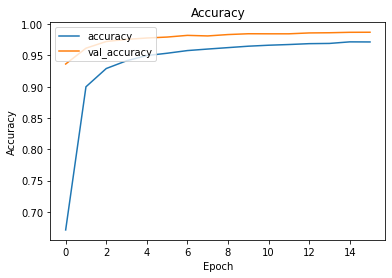

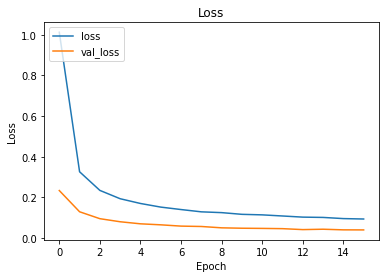

In [22]:
ept.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3/ Quelques examples

2022-05-05 22:30:53.009756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


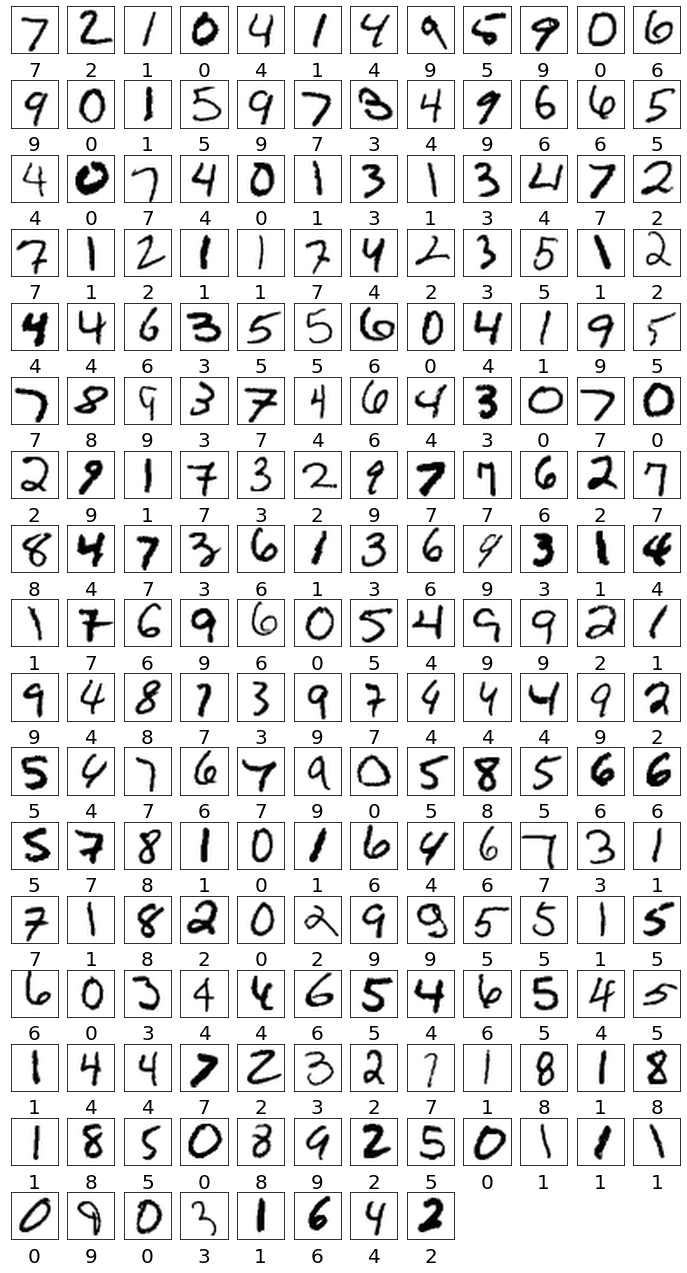

In [23]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

ept.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4/ Quelques erreurs

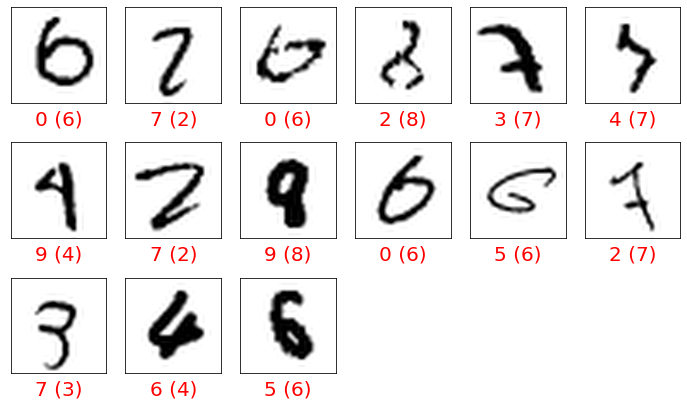

In [24]:
errors = [i for i in range(len(x_test)) if y_pred[i] != y_test[i]]
errors = errors[:min(28, len(errors))]
ept.plot_images(x_test, y_test, errors[:15], columns=6,
                x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')


### 6.5/ La matrice de confusion

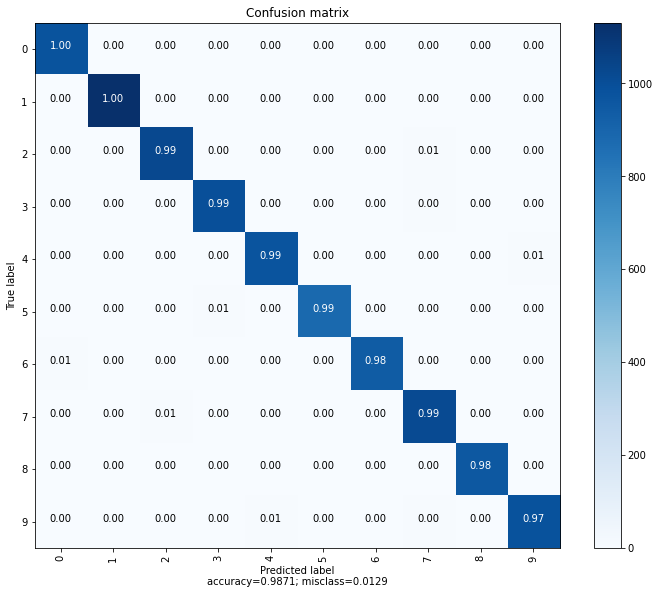

In [25]:
ept.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

# the end